In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import bz2
import re
import os
import gc
import matplotlib.pyplot as plt

In [2]:
train_file = bz2.BZ2File('train.ft.txt.bz2')
test_file = bz2.BZ2File('test.ft.txt.bz2')

In [3]:
type(train_file)

bz2.BZ2File

### Convert features to numpy arrays

In [4]:
def load_extract(file):
    texts, labels = [], [] 
    for line in file:
        x = line.decode('utf-8')  # decode binary to string
        labels.append(int(x[9]) - 1)  # extract labels
        texts.append(x[10:].strip())  # extract texts
    print('Done !')
    return np.array(labels), texts

In [5]:
train_labels, train_texts = load_extract(train_file)
test_labels, test_texts = load_extract(test_file)

Done !
Done !


In [6]:
type(train_labels)

numpy.ndarray

In [7]:
type(train_texts)

list

In [8]:
train_labels.shape

(3600000,)

In [9]:
len(train_texts)

3600000

In [10]:
train_data = pd.DataFrame(data=train_labels, columns=['label'])
train_data['text'] = train_texts

In [11]:
test_data = pd.DataFrame(data=test_labels, columns=['label'])
test_data['text'] = test_texts

In [12]:
train_data.head()

,label,text
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."


In [13]:
train_data['label'].unique()

array([1, 0])

In [14]:
train_data.head()

,label,text
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."


In [36]:
train_texts[0]

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [37]:
train_labels[0]

1

In [38]:
train_data[train_data['label'] == 0]

,label,text
6,0,"Buyer beware: This is a self-published book, a..."
10,0,The Worst!: A complete waste of time. Typograp...
13,0,Oh please: I guess you have to be a romance no...
14,0,Awful beyond belief!: I feel I have to write t...
15,0,Don't try to fool us with fake reviews.: It's ...
...,...,...
3599994,0,Too simplistic: While Mr. Harrison makes some ...
3599995,0,Don't do it!!: The high chair looks great when...
3599996,0,"Looks nice, low functionality: I have used thi..."
3599997,0,"compact, but hard to clean: We have a small ho..."


In [39]:
train_texts[6]

'Buyer beware: This is a self-published book, and if you want to know why--read a few paragraphs! Those 5 star reviews must have been written by Ms. Haddon\'s family and friends--or perhaps, by herself! I can\'t imagine anyone reading the whole thing--I spent an evening with the book and a friend and we were in hysterics reading bits and pieces of it to one another. It is most definitely bad enough to be entered into some kind of a "worst book" contest. I can\'t believe Amazon even sells this kind of thing. Maybe I can offer them my 8th grade term paper on "To Kill a Mockingbird"--a book I am quite sure Ms. Haddon never heard of. Anyway, unless you are in a mood to send a book to someone as a joke---stay far, far away from this one!'

In [40]:
train_data.isnull().sum()

label    0
text     0
dtype: int64

In [41]:
sentiment_counts = train_data['label'].value_counts()
print(sentiment_counts)

1    1800000
0    1800000
Name: label, dtype: int64


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Train Labels distribution')

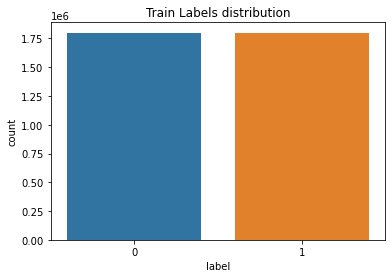

In [42]:
sns.countplot(train_data['label'])
plt.title('Train Labels distribution')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Train Labels distribution')

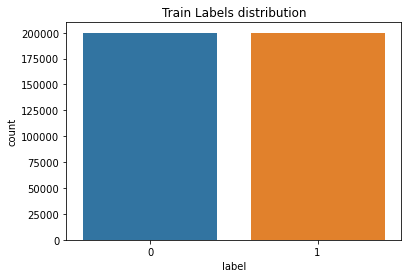

In [43]:
sns.countplot(test_data['label'])
plt.title('Train Labels distribution')

In [44]:
train_data['text_length'] = train_data['text'].apply(len)

In [45]:
test_data['text_length'] = test_data['text'].apply(len)

In [46]:
train_data

,label,text,text_length
0,1,Stuning even for the non-gamer: This sound tra...,426
1,1,The best soundtrack ever to anything.: I'm rea...,509
2,1,Amazing!: This soundtrack is my favorite music...,760
3,1,Excellent Soundtrack: I truly like this soundt...,743
4,1,"Remember, Pull Your Jaw Off The Floor After He...",481
...,...,...,...
3599995,0,Don't do it!!: The high chair looks great when...,411
3599996,0,"Looks nice, low functionality: I have used thi...",976
3599997,0,"compact, but hard to clean: We have a small ho...",956
3599998,0,what is it saying?: not sure what this book is...,484


In [47]:
test_data

,label,text,text_length
0,1,Great CD: My lovely Pat has one of the GREAT v...,533
1,1,One of the best game music soundtracks - for a...,816
2,0,Batteries died within a year ...: I bought thi...,335
3,1,"works fine, but Maha Energy is better: Check o...",229
4,1,Great for the non-audiophile: Reviewed quite a...,412
...,...,...,...
399995,0,Unbelievable- In a Bad Way: We bought this Tho...,866
399996,0,"Almost Great, Until it Broke...: My son reciev...",614
399997,0,Disappointed !!!: I bought this toy for my son...,591
399998,1,Classic Jessica Mitford: This is a compilation...,243


In [48]:
train_data.to_csv("train_data.csv")
test_data.to_csv("test_data.csv")

In [49]:
train_data['text_length'].describe()

count    3.600000e+06
mean     4.316463e+02
std      2.375526e+02
min      7.200000e+01
25%      2.310000e+02
50%      3.830000e+02
75%      5.950000e+02
max      1.015000e+03
Name: text_length, dtype: float64

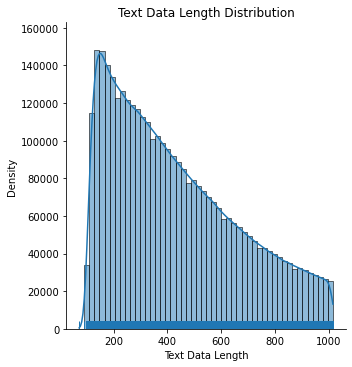

In [50]:
import seaborn as sns

sns.displot(train_data['text_length'], kde=True, rug=True, bins=50)
plt.title('Text Data Length Distribution')
plt.xlabel('Text Data Length')
plt.ylabel('Density')
plt.show()

In [51]:
train_data.head()

,label,text,text_length
0,1,Stuning even for the non-gamer: This sound tra...,426
1,1,The best soundtrack ever to anything.: I'm rea...,509
2,1,Amazing!: This soundtrack is my favorite music...,760
3,1,Excellent Soundtrack: I truly like this soundt...,743
4,1,"Remember, Pull Your Jaw Off The Floor After He...",481


Negative mean length: 447.45
Positive mean length: 415.84
Mean Difference: 31.62


Text(0.5, 1.0, 'Review Size Categorization')

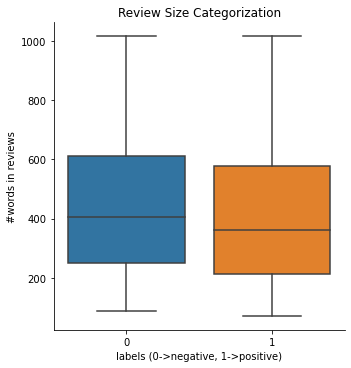

In [52]:
neg_mean_len = train_data.groupby('label')['text_length'].mean().values[0]
pos_mean_len = train_data.groupby('label')['text_length'].mean().values[1]

print(f"Negative mean length: {neg_mean_len:.2f}")
print(f"Positive mean length: {pos_mean_len:.2f}")
print(f"Mean Difference: {neg_mean_len-pos_mean_len:.2f}")
sns.catplot(x='label', y='text_length', data=train_data, kind='box')
plt.xlabel("labels (0->negative, 1->positive)")
plt.ylabel("#words in reviews")
plt.title("Review Size Categorization")

In [54]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

ModuleNotFoundError: No module named 'wordcloud'

In [55]:
text = " ".join(df['Text'].astype(str))

KeyError: 'Text'

In [ ]:
wordcloud = WordCloud(background_color='white', stopwords=stop_words).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

### Future Scope

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_class(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score > 0:
        return 'Positive'
    elif compound_score < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
data['Sentiment Class'] = df['Text'].apply(get_sentiment_class)
sentiment_class_counts = data['Sentiment Class'].value_counts()
print(sentiment_class_counts)

In [56]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from multiprocessing import Pool
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Define the function to classify text data as positive, negative, or neutral based on the sentiment scores
def get_sentiment_class(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score > 0:
        return 'Positive'
    elif compound_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Use multiprocessing to apply the function to the text data column
with Pool() as pool:
    df['Sentiment Class'] = pool.map(get_sentiment_class, df['Text'])

# Count the number of positive and negative sentiment classes
sentiment_class_counts = df['Sentiment Class'].value_counts()
print(sentiment_class_counts)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tanmaymahindrakar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


KeyError: 'Text'

In [57]:
import pandas as pd
import nltk

# Download the positive and negative word lists from nltk
nltk.download('opinion_lexicon')

# Load the positive and negative word lists
positive_words = set(nltk.corpus.opinion_lexicon.positive())
negative_words = set(nltk.corpus.opinion_lexicon.negative())

# Load the data into a Pandas DataFrame
data = pd.read_csv('your_file.csv')

# Count the number of positive and negative words in the 'text' column
num_positive_words = data['text'].apply(lambda x: len([w for w in x.lower().split() if w in positive_words])).sum()
num_negative_words = data['text'].apply(lambda x: len([w for w in x.lower().split() if w in negative_words])).sum()

# Print the results
print(f"Number of positive words: {num_positive_words}")
print(f"Number of negative words: {num_negative_words}")


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/tanmaymahindrakar/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


FileNotFoundError: [Errno 2] No such file or directory: 'your_file.csv'

In [18]:
display(df.shape)

NameError: name 'df' is not defined

In [19]:
import pandas as pd


df_logistic = train_data # select 5000 random samples



In [20]:
display(df_logistic.shape)

(3600000, 2)

In [61]:
#### Logistic

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_logistic['text'], df_logistic['label'], random_state=42)

# transform the text data into a bag-of-words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# train the logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# evaluate the classifier on the test set
score = clf.score(X_test, y_test)
print('Accuracy:', score)


Accuracy: 0.8408


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
### Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# read the data and select 5000 samples
df_NB = train_data.sample(n=5000, random_state=42)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_NB['text'], df_NB['label'], random_state=42)

# transform the text data into a bag-of-words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# evaluate the classifier on the test set
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)


Accuracy: 0.8352


In [18]:
### SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# read the data and select 5000 samples

df_SVM = train_data.sample(n=5000, random_state=42)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_SVM['text'], df_SVM['label'], random_state=42)

# transform the text data into a bag-of-words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# train the SVM classifier
clf = SVC()
clf.fit(X_train, y_train)

# evaluate the classifier on the test set
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)


Accuracy: 0.8192


In [64]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# read the data and select 5000 samples

df_RF = df.sample(n=5000, random_state=42)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_RF['text'], df_RF['label'], random_state=42)

# transform the text data into a bag-of-words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# train the Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# evaluate the classifier on the test set
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)


Accuracy: 0.8296


In [65]:
### Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# read the data and select 5000 samples

df_GD = train_data.sample(n=5000, random_state=42)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_GD['text'], df_GD['label'], random_state=42)

# transform the text data into a bag-of-words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# train the Gradient Boosting classifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

# evaluate the classifier on the test set
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)


Accuracy: 0.7888


In [22]:
### Logistic with hypterparameter tuning

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


df = train_data

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state=42)

# define the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('clf', LogisticRegression())
])

# define the hyperparameters to search over
params = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

# perform a grid search over the hyperparameters
grid_search = GridSearchCV(pipeline, params, cv=5)
grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 0.9050433333333333


In [24]:
import joblib
joblib.dump(best_model, 'my_logistic_model.pkl')

['my_logistic_model.pkl']

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


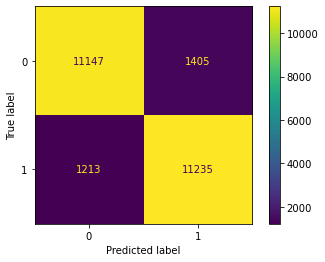

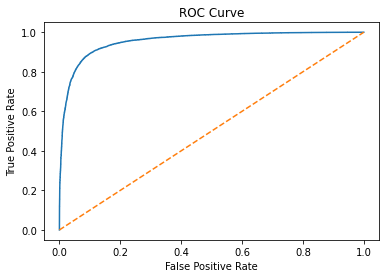

AUC Score: 0.956385146018783


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

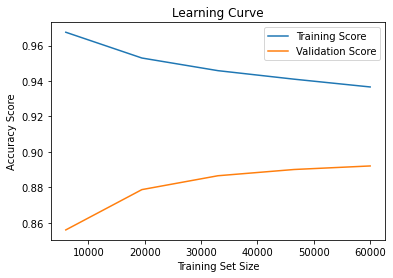

In [70]:
from sklearn.metrics import plot_confusion_matrix

# plot confusion matrix for the best model
plot_confusion_matrix(best_model, X_test, y_test)
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# calculate ROC curve for the best model
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)
print('AUC Score:', auc_score)


from sklearn.model_selection import learning_curve

# plot learning curve for the best model
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


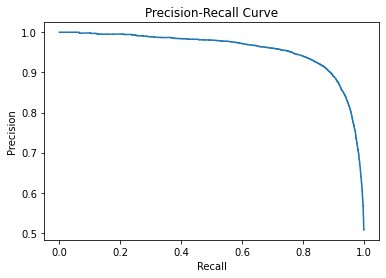

Average Precision Score: 0.9561082615001033


In [71]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# calculate precision-recall curve for the best model
y_prob = best_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# calculate average precision score
ap_score = average_precision_score(y_test, y_prob)
print('Average Precision Score:', ap_score)


In [72]:
# plot feature importances for the best model
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]

    plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align='center')
    plt.xticks(range(X_train.shape[1]), indices)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importances')
    plt.show()


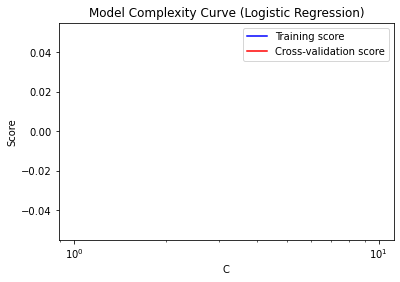

In [73]:
from sklearn.model_selection import validation_curve

# define range of values for the hyperparameter
param_range = [0.001, 0.01, 0.1, 1, 10, 100]

# calculate training and validation scores for different values of the hyperparameter
train_scores, valid_scores = validation_curve(LogisticRegression(), X_train, y_train, 
                                              param_name='C', param_range=param_range, cv=5)

# calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# plot model complexity curve
plt.semilogx(param_range, train_mean, label='Training score', color='blue')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.semilogx(param_range, valid_mean, label='Cross-validation score', color='red')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='red')
plt.legend(loc='best')
plt.xlabel('C')
plt.ylabel('Score')
plt.title('Model Complexity Curve (Logistic Regression)')
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


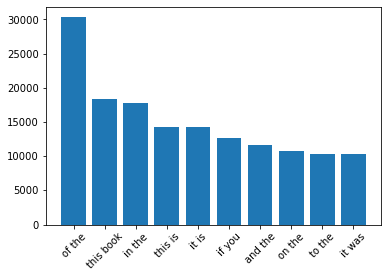

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

# create a count vectorizer object for bigrams
cv = CountVectorizer(ngram_range=(2,2))

# fit and transform the training data
X_train_counts = cv.fit_transform(X_train)

# get the sum of the bigram counts across the entire training data
bigram_counts = X_train_counts.sum(axis=0)

# get the top 10 bigrams by count
top_bigrams = sorted([(count, bigram) for bigram, count in zip(cv.get_feature_names(), bigram_counts.tolist()[0])], reverse=True)[:10]

# plot a bar chart of the top 10 bigrams
plt.bar([x[1] for x in top_bigrams], [x[0] for x in top_bigrams])
plt.xticks(rotation=45)
plt.show()


In [75]:
class StemmingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stemmer = PorterStemmer()
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_stemmed = X.apply(lambda x: ' '.join([self.stemmer.stem(word) for word in x.split()]))
        return X_stemmed


NameError: name 'BaseEstimator' is not defined

In [39]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.stem import PorterStemmer


# define the pipeline with additional text preprocessing steps
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))),
    ('stemmer', StemmingTransformer()),
    ('clf', LogisticRegression())
])

# define the hyperparameters to search over
params = {
    'vectorizer__max_df': (0.5, 0.75, 1.0),
    'vectorizer__min_df': (2, 5),
    'vectorizer__max_features': (None, 5000, 10000),
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

# create a custom transformer to perform stemming

# perform a grid search over the hyperparameters
grid_search = GridSearchCV(pipeline, params, cv=5)
grid_search.fit(X_train, y_train)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/

AttributeError: apply not found

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

# read the data and select 5000 samples

df = train_data.sample(n=5000, random_state=42)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state=42)

# define the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('clf', LogisticRegression(C=0.1, penalty='l2'))
])

# define the hyperparameters to search over
params = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

# perform a grid search over the hyperparameters
grid_search = GridSearchCV(pipeline, params, cv=5)
grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 0.8504


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# read the data and select 5000 samples

df = train_data.sample(n=1000, random_state=42)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state=42)

# define the pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1,2))),
    ('clf', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000))
])

# define the hyperparameters to search over
params = {
    'clf__C': [0.1, 1, 10],
    'clf__l1_ratio': [0.2, 0.5, 0.8]
}

# perform a grid search over the hyperparameters
grid_search = GridSearchCV(pipeline, params, cv=5)
grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)


Accuracy: 0.812


Accuracy: 0.8128


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


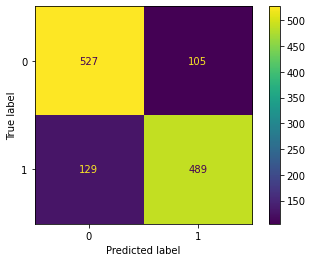

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


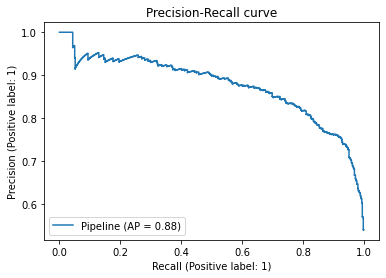

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


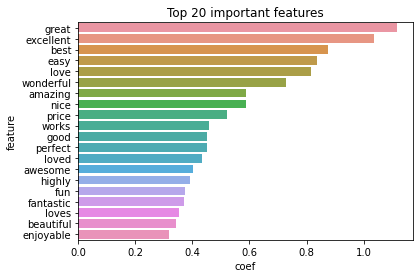

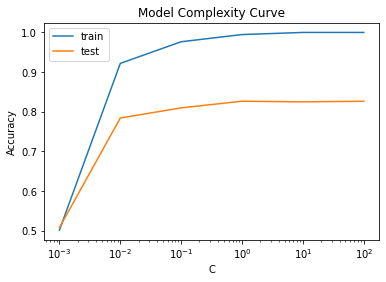

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       632
           1       0.82      0.79      0.81       618

    accuracy                           0.81      1250
   macro avg       0.81      0.81      0.81      1250
weighted avg       0.81      0.81      0.81      1250



In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

# read the data and select 5000 samples
df = train_data.sample(n=5000, random_state=42)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state=42)

# define the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english', ngram_range=(1, 3))),
    ('clf', LogisticRegression(C=0.1, penalty='l2', max_iter=1000))
])

# fit the model
pipeline.fit(X_train, y_train)

# make predictions on the test set
y_pred = pipeline.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(pipeline, X_test, y_test)
plt.show()

# plot precision-recall curve
disp = plot_precision_recall_curve(pipeline, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve')
plt.show()

# plot feature importance
coef = pipeline.named_steps['clf'].coef_
feature_names = pipeline.named_steps['vectorizer'].get_feature_names()
df_coef = pd.DataFrame({'coef': coef[0], 'feature': feature_names})
df_coef = df_coef.sort_values('coef', ascending=False)[:20]
sns.barplot(data=df_coef, x='coef', y='feature')
plt.title('Top 20 important features')
plt.show()

# plot model complexity curve
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
X_train_vec = vectorizer.fit_transform(X_train)
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []
for c in c_values:
    lr = LogisticRegression(C=c, penalty='l2', max_iter=1000)
    lr.fit(X_train_vec, y_train)
    train_score = accuracy_score(y_train, lr.predict(X_train_vec))
    test_score = accuracy_score(y_test, lr.predict(vectorizer.transform(X_test)))
    train_scores.append(train_score)
    test_scores.append(test_score)
plt.plot(c_values, train_scores, label='train')
plt.plot(c_values, test_scores, label='test')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Complexity Curve')
plt.show()

# classification report
print(classification_report(y_test, y_pred))


In [25]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

nltk.download('punkt')
nltk.download('stopwords')

stemmer = SnowballStemmer('english')

stop_words = stopwords.words('english')

def preprocess_text(text):
    # remove non-alphanumeric characters
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # tokenize the text
    tokens = word_tokenize(text)

    # remove stopwords and stem
    stemmed_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    # join the tokens back together
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tanmaymahindrakar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tanmaymahindrakar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def predict_sentiment(text):
    # preprocess the text
    text = preprocess_text(text)
    # use the best model obtained from hyperparameter tuning
    y_pred = best_model.predict([text])
    return y_pred[0]
text = "This movie is horrible"
label = predict_sentiment(text)
print(label)  # output: 1


1


In [88]:
# new_text = "really good product but this is not for teenagers"
# new_text = "I would've appreciated the product, but the delivery was bad!"
# new_text = 'Wow!!! No words describe how bland this book is. It took me a lot to even pick up to read. I would definitely not recommend this book'
# new_text = "Ridiculously good"
# new_text = "I wouldn't recommend this to anyone"
new_text = "One of the greatest products by Nike, not bad"
new_text = "One of the greatest product by Nike, will not use any other product from now on"
new_text = "I have mixed feelings, not bad or not good."
new_text = "I'm not feeling sad after making this purchase"

# use the loaded model to predict the label of the new text
predicted_label = best_model.predict([new_text])[0]

# print the predicted label
print("Text:",new_text)
print("The predicted label of the new text is:", predicted_label)
proba = best_model.predict_proba([new_text])[0]

# print the predicted probabilities for each class
print("Negative Probability:", proba[0])
print("Positive Probability:", proba[1])

Text: I'm not feeling sad after making this purchase
The predicted label of the new text is: 0
Negative Probability: 0.7857165372788283
Positive Probability: 0.2142834627211717


In [75]:
import pyspark